In [18]:
import cv2
import matplotlib.pyplot as plt

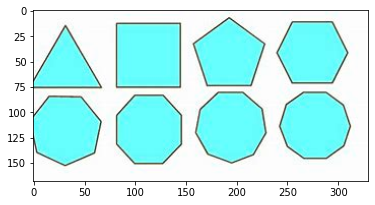

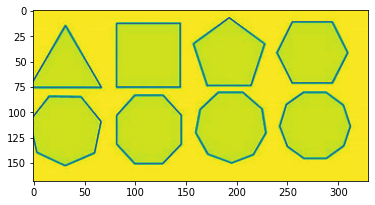

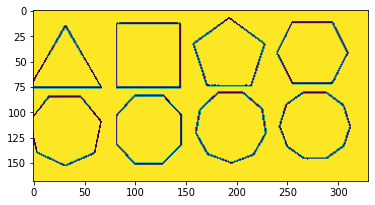

In [19]:
image = cv2.imread("corner.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

plt.imshow(image)
plt.show()
plt.imshow(gray)
plt.show()
plt.imshow(thresh)

10
[INFO] examining component 1/10 (background)
0 7 313 146 2865


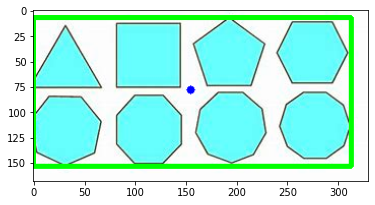

[INFO] examining component 2/10
0 0 330 168 27232


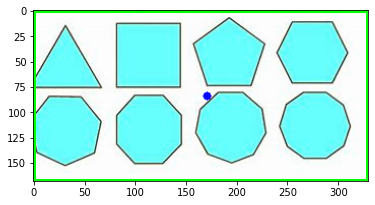

[INFO] examining component 3/10
159 9 68 65 3071


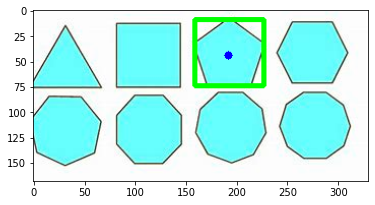

[INFO] examining component 4/10
241 13 68 58 3088


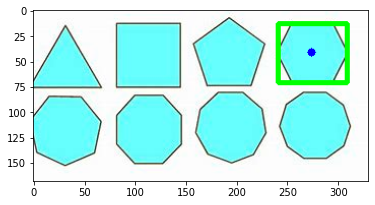

[INFO] examining component 5/10
83 14 61 61 3721


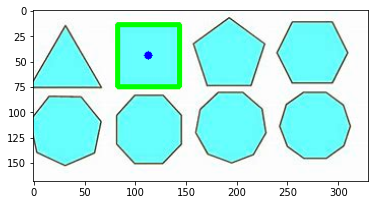

[INFO] examining component 6/10
0 18 66 57 1954


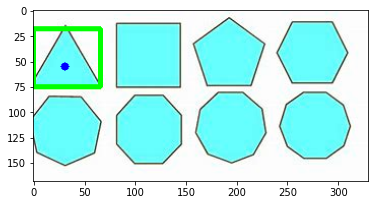

[INFO] examining component 7/10
161 82 68 67 3436


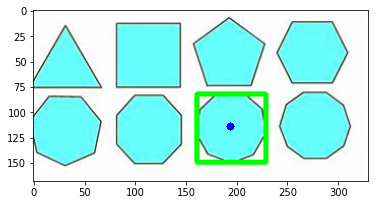

[INFO] examining component 8/10
244 82 68 63 3320


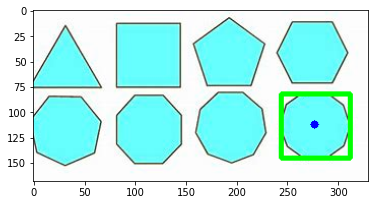

[INFO] examining component 9/10
83 85 62 65 3397


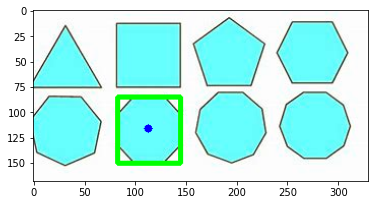

[INFO] examining component 10/10
0 86 66 66 3356


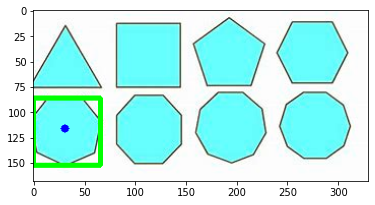

In [24]:
output = cv2.connectedComponentsWithStats(thresh, 4, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

print(len(output[3]))
# loop over the number of unique connected component labels
for i in range(0, numLabels):
    
    if i == 0:
        text = "examining component {}/{} (background)".format(i + 1, numLabels)
    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)
    # print a status message update for the current connected
    # component
    print("[INFO] {}".format(text))
    # extract the connected component statistics and centroid for
    # the current label
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]
    
    print(x,y,w,h,area)
    
    output = image.copy()
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)

    componentMask = (labels == i).astype("uint8") * 255
    # show our output image and connected component mask
    plt.imshow( output)
    plt.show()